In [91]:
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
import matplotlib
from astropy.cosmology import Planck15 as cosmo, z_at_value
from astropy import coordinates as coord
import astropy.constants as const
import astropy.units as unit
import healpy as hp
from datetime import datetime

In [92]:
nside = 1024
inpath = '/cosma6/data/dp004/dc-boot5/Lens Maps/Convergence/'
fname = inpath + 'Kappa_map_SHT_nside_{0:0d}'.format(nside)

In [93]:
m0, m1 = hp.read_map(fname, field = (0,1))

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [94]:
gamma = np.sqrt(m0*m0 + m1*m1)

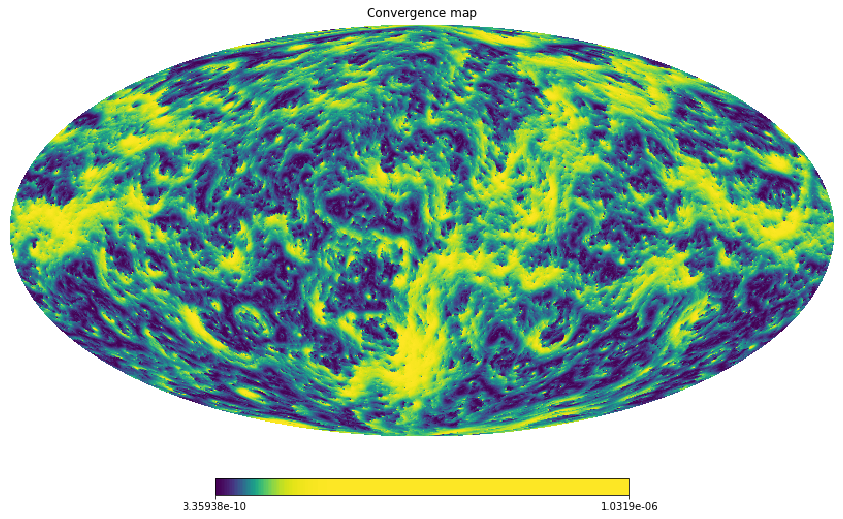

In [95]:
fig1 = plt.figure(figsize = (12,12))
hp.mollview(gamma, norm = 'hist', fig = fig1.number, title = 'Convergence map')
#plt.savefig('Convergence map, nside={0:0d}'.format(nside))

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


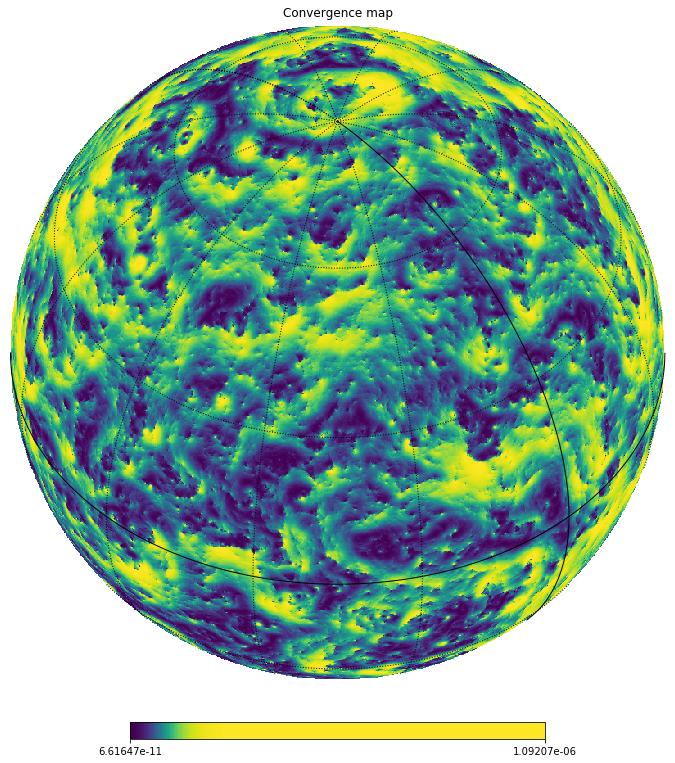

In [87]:
fig2 = plt.figure(figsize = (12,12))
hp.orthview(gamma, norm = 'hist', fig = fig2.number, title = 'Convergence map', half_sky = True, rot = (45,45,0))
hp.graticule()

In [82]:
print('anafast started', datetime.now())
cl = hp.anafast(gamma, alm = False)
ell = np.arange(len(cl))
print('anafast completed', datetime.now())

anafast started 2020-03-13 16:12:11.991044
anafast completed 2020-03-13 16:12:15.270776


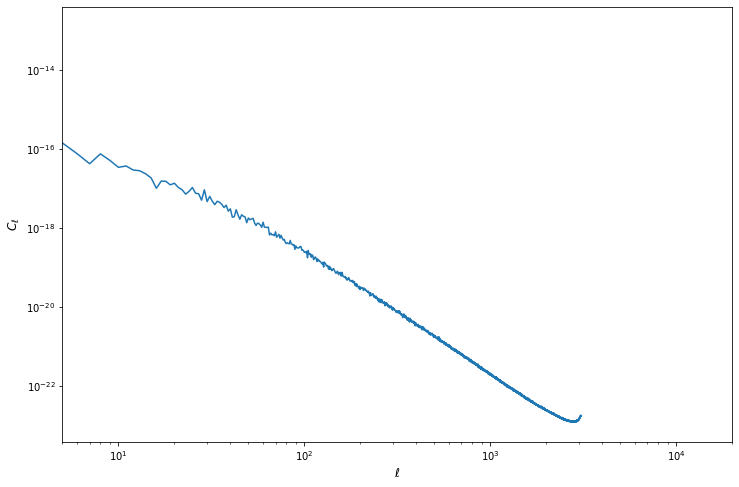

In [83]:
plt.figure(figsize = (12,8))
plt.loglog(ell,cl)
plt.xlabel('$\ell$', size = 'large')
plt.ylabel('$C_{\ell}$', size = 'large')
plt.xlim(5, 2e4)
#plt.ylim(1e-3,1e3)
plt.show()

In [90]:
cl2 = cl * (ell*(1+ell))/(2*np.pi)

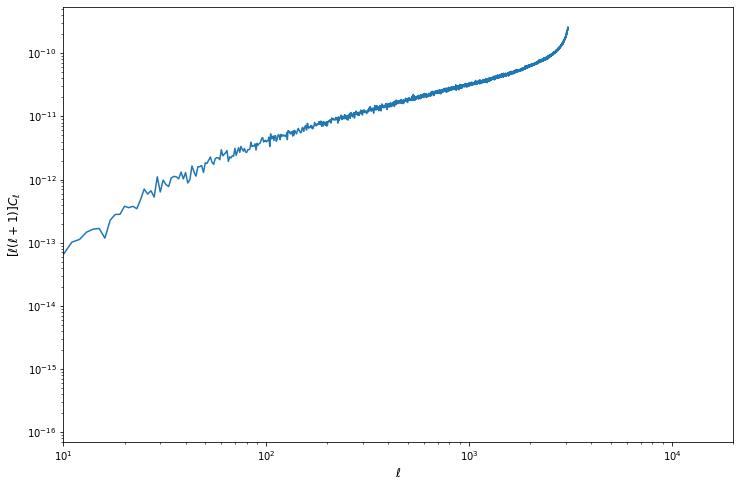

In [89]:
plt.figure(figsize = (12,8))
plt.loglog(ell,cl2)
plt.xlabel('$\ell$', size = 'large')
plt.ylabel('$[\ell(\ell+1)]C_{\ell}$', size = 'large')
plt.xlim(1e1, 2e4)
#plt.ylim(2e3,3e5)
plt.show()